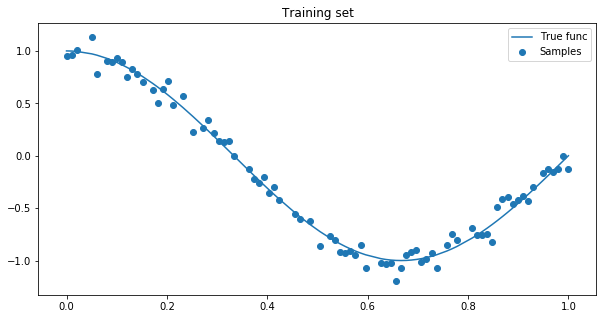

In [166]:
# generate data

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

def f(X):
    return np.cos(1.5 * np.pi * X)

m = 100
X = np.linspace(0, 1, m)
y = f(X) + np.random.randn(m) * 0.07

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# plot the data
plt.figure(figsize=(10, 5))

plt.title('Training set')
plt.scatter(X_train, y_train, label='Samples')
plt.plot(np.sort(X_train), f(np.sort(X_train)), label='True func')
plt.legend()

In [188]:
# introduce learning function

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

def learn(X_train, y_train, X_test, degree=2):
    poly = PolynomialFeatures(degree=degree)

    # learn the parameters
    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
    model = linear_model.LinearRegression().fit(X_train_poly, y_train)

    # predict
    X_test_poly = poly.fit_transform(X_test.reshape(-1, 1))
    return model.predict(X_test_poly)


# unit test
import math

actual = learn(
    np.array([1, 2, 3, 4]),
    np.array([1, 2, 9, 16]),
    np.array([5]),
    2
)
print(f'learn = {math.isclose(27.5, actual)}')

learn = True


degree = 1	R^2 score = 0.666818013589535	MSE = 0.16366243778046843
degree = 3	R^2 score = 0.9881421936991894	MSE = 0.00582467709862452
degree = 33	R^2 score = 0.957893062649744	MSE = 0.02068336313273118


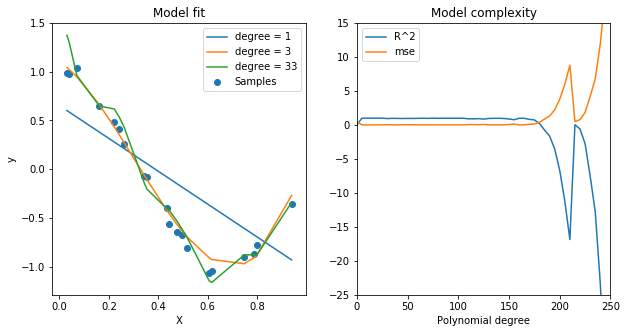

In [210]:
# find proper polynomial degree

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error


fig, (pltLeft, pltRight) = plt.subplots(1, 2, figsize=(10, 5))

# plot the model fit
for degree in [1, 3, 33]:
    y_predict = learn(X_train, y_train, X_test, degree)
    # run metrics
    print(f'degree = {degree}\tR^2 score = {r2_score(y_test, y_predict)}\tMSE = {mean_squared_error(y_test, y_predict)}')

    # plot the prediction
    testSet_sorted = sorted(zip(X_test, y_predict), key=lambda i: i[0])
    pltLeft.plot(*zip(*testSet_sorted), label=f'degree = {degree}')

pltLeft.scatter(X_test, y_test, label='Samples')
pltLeft.set_title('Model fit')
pltLeft.set_xlabel('X')
pltLeft.set_ylabel('y')
pltLeft.legend()

# plot relations to a degree
r2ToDegree = []
mseToDegree = []
degrees = list(map(lambda i: 5 * i, range(50)))
for degree in degrees:
    y_predict = learn(X_train, y_train, X_test, degree)

    # run metrics
    r2ToDegree.append(r2_score(y_test, y_predict))
    mseToDegree.append(mean_squared_error(y_test, y_predict))


pltRight.plot(degrees, r2ToDegree, label='R^2')
pltRight.plot(degrees, mseToDegree, label='mse')
pltRight.axis([0, 250, -25, 15])
pltRight.set_title('Model complexity')
pltRight.set_xlabel('Polynomial degree')
pltRight.legend()